In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv', index_col='Date', parse_dates=True, usecols=[0, 1])

df.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [14]:
df.shape

(59, 1)

In [15]:
df['month'] = df.index.month

df.head(10)

,Avila Adobe,month
Date,,
2014-01-01,24778,1
2014-02-01,18976,2
2014-03-01,25231,3
2014-04-01,26989,4
2014-05-01,36883,5
2014-06-01,29487,6
2014-07-01,32378,7
2014-08-01,37680,8
2014-09-01,28473,9


In [16]:
df['year'] = df.index.year

df.head(10)

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014
2014-06-01,29487,6,2014
2014-07-01,32378,7,2014
2014-08-01,37680,8,2014
2014-09-01,28473,9,2014


In [17]:
df = df.groupby(['month', 'year']).max()

df.head(10)

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718

In [18]:
df = df.unstack(level=0)

In [19]:
df

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

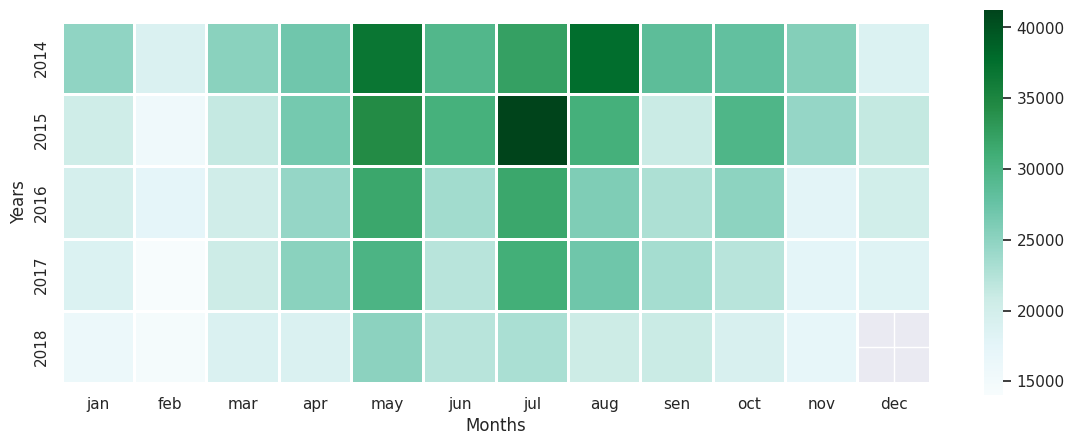

In [20]:
plt.figure(figsize=(14, 5))

sns.heatmap(data=df, linewidths=2, xticklabels=['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sen', 'oct', 'nov', 'dec'], cmap='BuGn', square=True)

plt.ylabel("Years")
plt.xlabel("Months")
plt.show()

# Bonus

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")

df.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


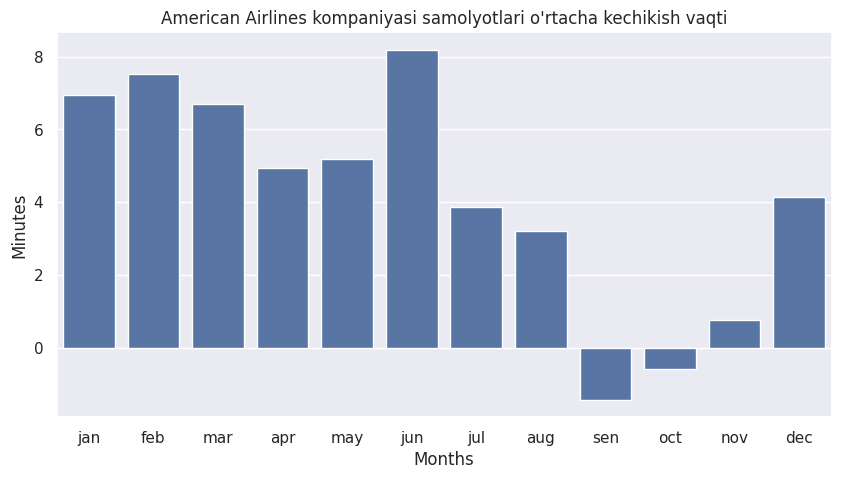

In [22]:
AA = df.set_index('Month')['AA']

sns.set()

plt.figure(figsize=(10, 5))

sns.barplot(data=AA)
plt.ylabel('Minutes')
plt.xlabel('Months')
plt.xticks(np.arange(12), labels=['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sen', 'oct', 'nov', 'dec'])
plt.title("American Airlines kompaniyasi samolyotlari o'rtacha kechikish vaqti")

plt.show()

In [26]:
compare = pd.melt(df, id_vars=['Month'], value_vars=['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN'])

compare

,Month,variable,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878
...,...,...,...
163,8,WN,5.532108
164,9,WN,-1.336260
165,10,WN,-0.688851
166,11,WN,0.995684


<Figure size 1000x500 with 0 Axes>

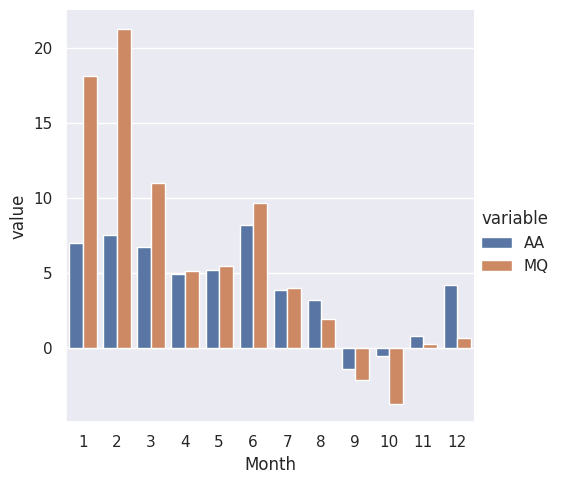

In [36]:
AAMQ = pd.melt(df[['Month', 'AA', 'MQ']], id_vars=['Month'], value_vars=['AA', 'MQ'])

plt.figure(figsize=(10 ,5))

sns.catplot(AAMQ, x='Month', kind='bar', y='value', hue='variable')

plt.show(), value_vars=['value']

<Figure size 1400x700 with 0 Axes>

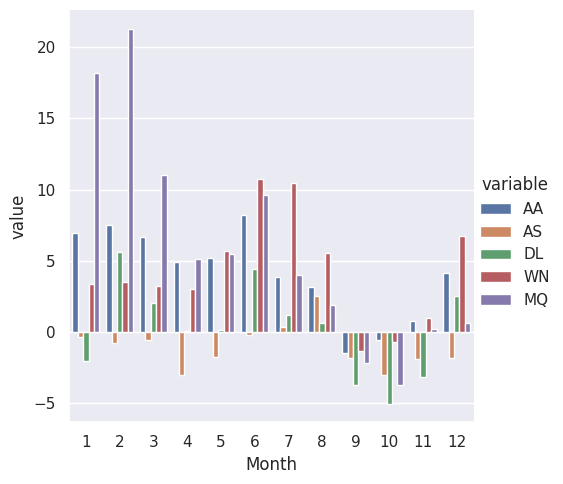

In [40]:
compare = pd.melt(df, id_vars=['Month'], value_vars=['AA', 'AS', 'DL', 'WN', 'MQ'])

plt.figure(figsize=(14, 7))

sns.catplot(compare, kind='bar', x='Month', y='value', hue='variable')

plt.show()

In [42]:
df.set_index('Month', inplace=True)

In [43]:
df

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


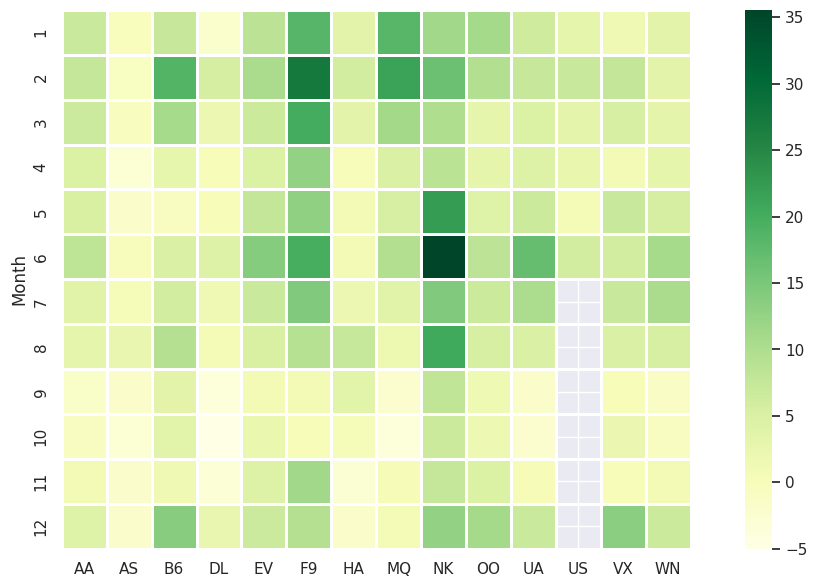

In [48]:
plt.figure(figsize=(14, 7))

y_labels = ['jan', 'feb', 'mar', 'apr', 'may', 'iyul', 'iyun', 'avg', 'sen', 'okt', 'noy', 'dek']

sns.heatmap(df, cmap='YlGn', linewidths=1, square=True)

plt.show()